In [2]:
%pip install pandas numpy matplotlib seaborn scikit-learn scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

wine = pd.read_csv('wine.csv')

wine.rename(columns={
    wine.columns[0]: 'Al',
    wine.columns[1]: 'Mal',
    wine.columns[3]: 'Alc',
    wine.columns[5]: 'TotP',
    wine.columns[6]: 'Flav',
    wine.columns[7]: 'NFlav',
    wine.columns[8]: 'Pro',
    wine.columns[11]: 'OD',
    wine.columns[4]: 'Mg',
    wine.columns[9]: 'Color',
    wine.columns[12]: 'Prl'
}, inplace=True)

wineSelec = wine[['Al', 'Color', 'Flav', 'Mal', 'Alc', 'OD', 'TotP', 'NFlav']]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


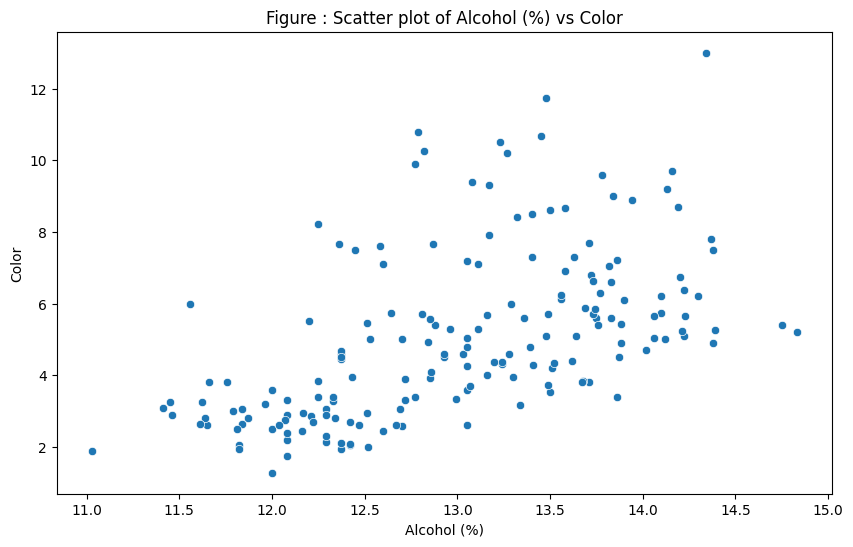

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wineSelec, x='Al', y='Color')
plt.xlabel('Alcohol (%)')
plt.ylabel('Color')
plt.title('Figure : Scatter plot of Alcohol (%) vs Color')
plt.show()

In [4]:
# Calculate covariance
covariance = round(np.cov(wineSelec['Al'], wineSelec['Color'])[0, 1], 2)
print(f"Covariance between Al and Color: {covariance}")

# Calculate correlation
correlation = round(np.corrcoef(wineSelec['Al'], wineSelec['Color'])[0, 1], 2)
print(f"Correlation between Al and Color: {correlation}")

Covariance between Al and Color: 1.03
Correlation between Al and Color: 0.55


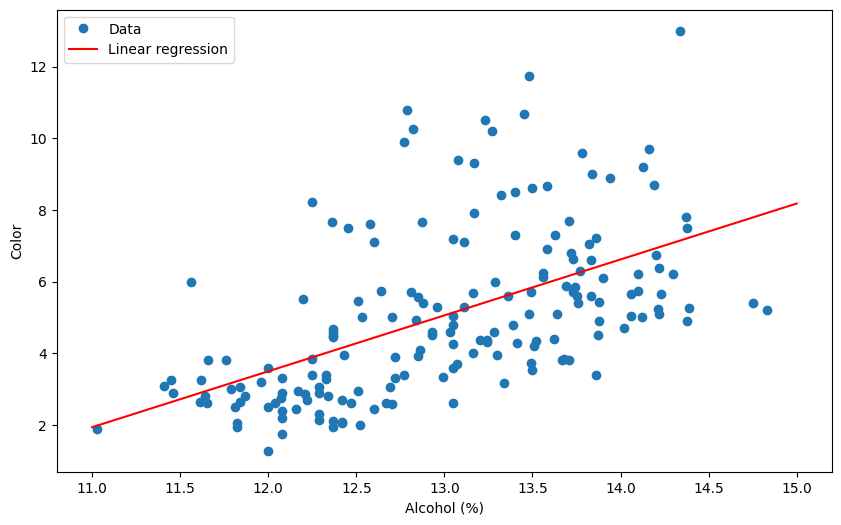

In [5]:
x_al = wineSelec['Al'].to_numpy().reshape(-1, 1)
y_color = wineSelec['Color'].to_numpy().reshape(-1, 1)
linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(x_al, y_color)

x_pred = np.linspace(11, 15, 100).reshape(-1, 1)
y_pred = linear_model.predict(x_pred)

plt.figure(figsize=(10, 6))
plt.plot(wineSelec['Al'], wineSelec['Color'], 'o')
plt.plot(x_pred, y_pred, 'r-')
plt.xlabel('Alcohol (%)')
plt.ylabel('Color')
plt.legend(['Data', 'Linear regression'])